In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from scipy import optimize
from scipy.optimize import curve_fit

import os
from functools import reduce
import scipy
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats.mstats import gmean

from scipy import optimize
from scipy.optimize import curve_fit

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import math

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from scipy.spatial import distance
from scipy.spatial.distance import *
from scipy.stats import pearsonr

/srv/app/venv/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# raw count data if you want to use it

dgr = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/dge_raw.txt?raw=true", sep="\t")

In [6]:
# normalized data
# rows [genes] x columns [cells]

dg = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/dge_normalized.txt?raw=true", sep="\t")

In [7]:
dg.head(10)

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
128up,2.5699,2.5087,0.0000,0.0000,0.0000,0.0000,0.0000,2.5561,2.5071,2.3432,...,0.0000,0.0000,3.5265,0.0000,0.0000,0.0000,0.0000,1.9716,0.0000,0.0000
140up,1.1599,3.0066,0.0000,0.0000,0.0000,3.2493,3.2082,3.9674,0.0000,0.0000,...,3.4705,0.0000,3.5265,3.1248,2.8336,3.2716,3.4109,2.7748,0.0000,0.0000
14-3-3epsilon,8.8384,8.7878,8.8431,8.8687,8.3452,8.9987,8.7877,8.8601,8.6240,8.7304,...,8.3828,8.1859,9.0986,8.5528,8.8086,8.8982,8.0289,8.3328,8.5545,7.7798
14-3-3zeta,5.9422,5.4336,6.0169,5.0161,6.0097,5.8153,5.6568,5.3236,6.6349,6.0485,...,4.4039,5.4592,6.9919,5.8807,6.3340,6.5884,5.6201,5.1725,4.6401,5.3180
18w,3.4430,3.0066,2.3175,4.0600,3.5326,2.3936,3.2082,2.5561,0.0000,0.0000,...,3.4705,0.0000,0.0000,0.0000,3.7287,0.0000,0.0000,0.0000,5.6108,3.4226
26-29-p,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2mit,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4EHP,4.6831,3.9139,3.1650,4.0600,4.2188,5.2961,2.3564,2.5561,0.0000,3.1935,...,0.0000,3.5544,0.0000,2.2813,3.7287,3.2716,0.0000,1.9716,0.0000,2.5513
4E-T,1.7945,2.5087,2.3175,3.6735,2.1776,0.0000,2.3564,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,2.2813,0.0000,0.0000,0.0000,0.0000,0.0000,2.5513
5-HT1A,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [8]:
# matrix with gene expression data
# transposed to make it cells [rows] x genes [columns]

X = (dg.values).T

In [9]:
# dimensions of matrix 

X.shape

(1297, 8924)

In [10]:
pca_all = PCA()

pca_all.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'fraciton variance explained')

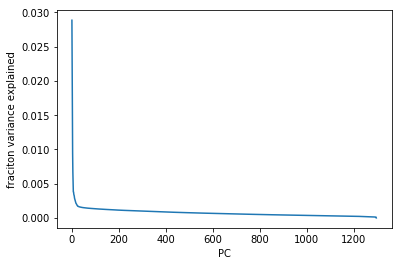

In [11]:
plt.plot(pca_all.explained_variance_ratio_)
plt.xlabel("PC")
plt.ylabel("fraciton variance explained")

Text(0, 0.5, 'fraciton variance explained')

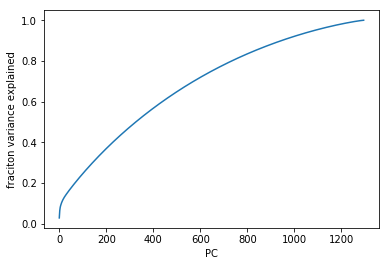

In [12]:
ve = pca_all.explained_variance_ratio_
sum_ve = [np.sum(ve[0:i]) for i in range(1,len(ve))]

plt.plot(sum_ve)
plt.xlabel("PC")
plt.ylabel("fraciton variance explained")

Text(0, 0.5, 'fraciton variance explained')

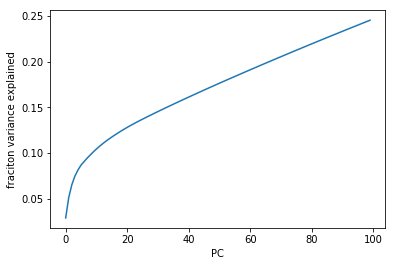

In [13]:
ve = pca_all.explained_variance_ratio_
sum_ve = [np.sum(ve[0:i]) for i in range(1,len(ve))]

plt.plot(sum_ve[0:100])
plt.xlabel("PC")
plt.ylabel("fraciton variance explained")

Hard to know exactly what the right # of principle components to use is. You should try different values.

In [14]:
# set up principle component analysis 
# you can play with the number of components

pca = PCA(n_components = 15)

In [15]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

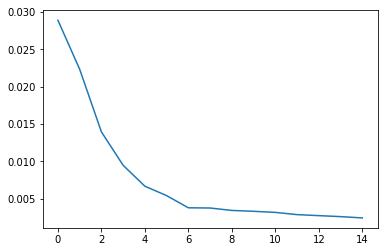

In [16]:
plt.plot(pca.explained_variance_ratio_)

Text(0, 0.5, 'fraciton variance explained')

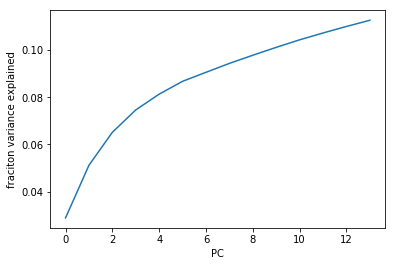

In [17]:
ve = pca.explained_variance_ratio_
sum_ve = [np.sum(ve[0:i]) for i in range(1,len(ve))]

plt.plot(sum_ve[0:100])
plt.xlabel("PC")
plt.ylabel("fraciton variance explained")

In [18]:
# transform input data into PCA coordinates

X_pca = pca.transform(X)

Text(0, 0.5, 'PC 2 (index = 1)')

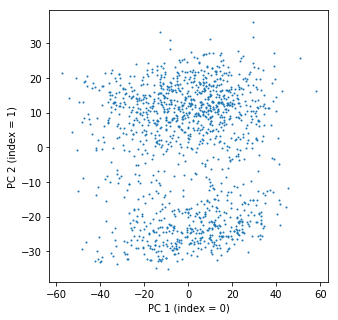

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,0],X_pca[:,1],s=1)
plt.xlabel("PC 1 (index = 0)")
plt.ylabel("PC 2 (index = 1)")


In [20]:
# lets look at the genes that dominate the sorting along PC 2

genes = dg.index

# PC2 has index 1
pc = pca.components_[1]

top10 = sorted(range(len(pc)), key=lambda i: pc[i], reverse = True)[-10:]
print ("Genes high in PC 2:")
for g in genes[top10]:
    print (g)
    
print ("")

bot10 = sorted(range(len(pc)), key=lambda i: pc[i])[-10:]
print ("Genes low in PC 2:")
for g in genes[bot10]:
    print (g)
    
print ("")

Genes high in PC 2:
Ilp4
CG14688
zfh1
CG16758
Mes2
Cyp310a1
sna
ventrally-expressed-protein-D
twi
CG4500

Genes low in PC 2:
grh
aop
sdt
jbug
bib
Atx-1
Lac
CG34224
ASPP
Ptr



Note that hi/low in principle components are arbitrary. The interesting thing is which genes are dominating the sorting. If your a fly operson, you'll imeediately see that this is dorsal ventral patterning, presumably separating cells along the top/bottom axis of the embryom although it's interesting to see that it splits into groups.  

Text(0, 0.5, 'PC 4 ')

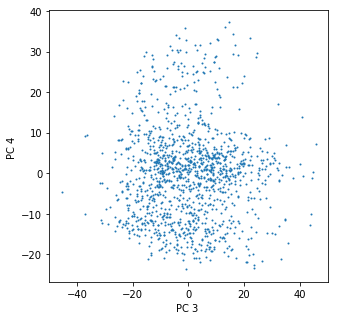

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,2],X_pca[:,3],s=1)
plt.xlabel("PC 3 ")
plt.ylabel("PC 4 ")


Text(0, 0.5, 'PC 6 ')

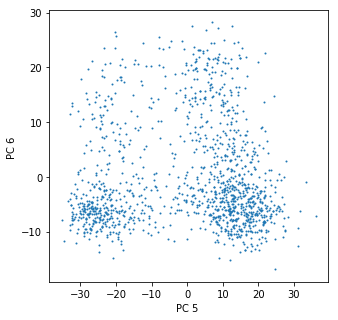

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:,1],X_pca[:,4],s=1)
plt.xlabel("PC 5 ")
plt.ylabel("PC 6 ")


In [23]:
# PC 5 looks interesting

# lets look at the genes that dominate the sorting along PC 2

genes = dg.index

# PC2 has index 1
pc = pca.components_[4]

top10 = sorted(range(len(pc)), key=lambda i: pc[i], reverse = True)[-10:]
print ("Genes high in PC 5:")
for g in genes[top10]:
    print (g)
    
print ("")

bot10 = sorted(range(len(pc)), key=lambda i: pc[i])[-10:]
print ("Genes low in PC 5:")
for g in genes[bot10]:
    print (g)
    
print ("")

Genes high in PC 5:
nub
fz2
CG34224
ftz
Ubx
run
Antp
opa
bxd
tsh

Genes low in PC 5:
CG42342
knrl
rib
apt
CG43085
ImpE2
oc
fj
Hsp83
CG3502



It's less obvious what this distinction might be. We can come back to it later.

In [24]:
# create a dataframe of the PCA results

dgpca = pd.DataFrame(data = X_pca)
dgpca['cellID'] = dg.columns
dgpca = dgpca.set_index("cellID")

In [25]:
dgpca.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cellID,,,,,,,,,,,,,,,
GTACTAATTACN_2,-50.578494,-0.722674,4.591521,-8.866956,14.555399,2.269843,-8.011421,-1.827041,3.656380,-6.969397,0.789035,-4.669389,-3.748171,0.031825,-0.986985
AGGCTAATGGAC_3,-35.965545,8.530567,-10.002884,-15.239768,5.314766,0.439942,-8.749837,-6.719493,2.456741,-4.270339,4.024453,7.872961,4.078723,0.160193,3.889641
TAGACAAAAGCT_4,-31.321712,-8.812651,12.396936,-3.294129,-1.839188,2.035392,-5.602335,-1.335481,6.626942,2.811385,2.501512,-3.870624,-4.554358,0.753070,0.753278
TCTACTAGTGTN_5,-27.194550,6.970546,0.009364,0.720226,28.235117,2.910437,3.697216,0.071198,-10.776283,2.901356,-2.217081,-10.641810,-6.906608,3.677051,-6.889608
CCGTGCTGAACA_3,-22.801996,-9.786833,-6.722043,-12.423785,-6.066810,11.053970,-5.823260,5.280763,2.710856,1.750570,3.528699,-1.561090,4.545932,2.727126,-2.747239
GAGAAAATGAAG_7,-23.780649,-5.182548,-0.963552,-3.324554,0.608347,-0.114055,1.258539,7.449694,-0.535479,-9.634345,-3.427177,-0.414973,-3.105762,-3.149725,9.759219
GCCTAGTGACGT_4,-26.881935,-18.823713,-6.121743,4.206228,6.012803,11.961774,-0.141860,-5.673257,4.200197,-2.252329,6.063326,1.473484,6.403220,1.622806,-1.423430
CAGTATCGAGAN_2,-22.099976,-10.170358,-3.363040,-3.920714,12.531540,0.513071,2.426530,3.642388,-6.640390,-1.527943,16.589113,-4.340008,1.679045,2.164063,1.545051
AGATTACCCTTC_6,-18.433824,12.903931,-12.437714,25.244049,-9.055014,1.907926,-11.731533,6.256875,1.833469,7.103375,6.510833,-5.375366,6.216932,-1.360307,-1.533032


In [26]:
# for future reference lets cluster cells in PCA space

gmm = GaussianMixture(n_components=15)
gmm_X_pca = gmm.fit(X_pca)
gmm_X_pca_predict = gmm.predict(X_pca)

In [28]:
# now lets run t-SNE on the PCA output

tsne = TSNE(n_components=2, early_exaggeration = 20, random_state = 2056814238)
X_pca_embed = tsne.fit_transform(X_pca)

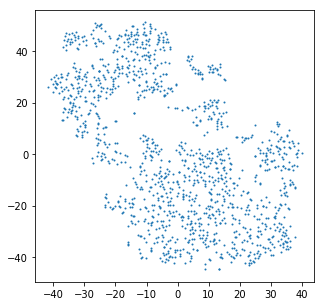

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1)

In [30]:
# cluster data in PC space

kmeans = KMeans(n_clusters=15).fit(X_pca)

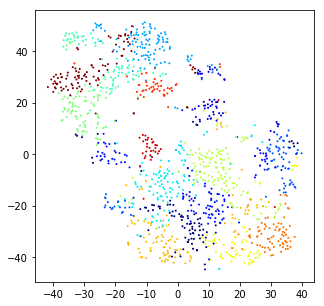

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1,c=kmeans.labels_,cmap='jet')

In [32]:
# what if we cluster data in original space

kmeans_orig = KMeans(n_clusters=15).fit(X)


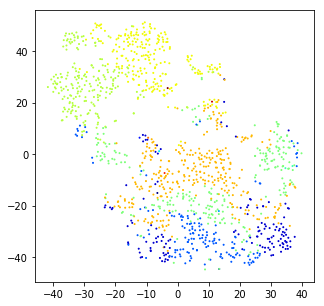

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1,c=kmeans_orig.labels_,cmap='jet')

In [34]:
# what if we cluster tsne data using kmeans

kmeans_tsne = KMeans(n_clusters=15).fit(X_pca_embed)


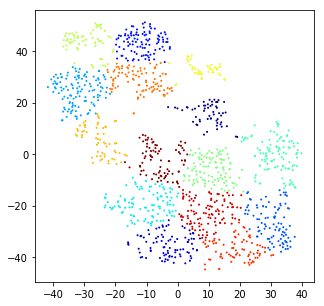

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1,c=kmeans_tsne.labels_,cmap='jet')

In [36]:
# or using Gaussian Mixture models

gmm = GaussianMixture(n_components=15)
gmmX = gmm.fit(X_pca_embed)
gmmXp = gmmX.predict(X_pca_embed)

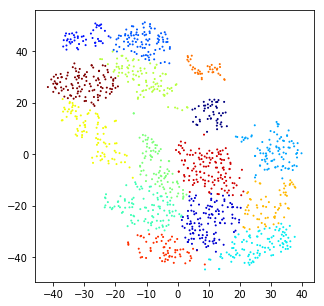

In [37]:
plt.figure(figsize=(5,5))
plt.scatter(X_pca_embed[:,0],X_pca_embed[:,1],s=1,c=gmmXp,cmap='jet')

In [38]:
# this this the raw insitu data
# structure is virtual cells [rows] x genes [columns]
# there are 3039 virtual cells

insitu_raw = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/bdtnp.txt?raw=true",sep='\t')

In [39]:
insitu_raw.head(10)

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0.116516,0.224190,0.033730,0.104307,0.673878,0.856570,0.469676,0.286151,0.320923,0.737946,...,0.353227,0.102896,0.153453,0.129360,0.087361,0.147089,0.225082,0.027564,0.297847,0.372422
1,0.113320,0.208761,0.044785,0.103447,0.743820,0.462554,0.570401,0.345240,0.320727,0.913163,...,0.268072,0.093506,0.206405,0.313327,0.230506,0.190749,0.440296,0.024157,0.455723,0.389489
2,0.092872,0.172598,0.036166,0.096985,0.838291,0.467538,0.478229,0.377768,0.297598,0.931254,...,0.315466,0.090488,0.196441,0.161869,0.102645,0.177968,0.347098,0.019817,0.598716,0.502384
3,0.101251,0.207963,0.066009,0.092872,0.597823,0.497481,0.479122,0.580058,0.334111,0.746340,...,0.211007,0.110080,0.205833,0.287976,0.382287,0.189138,0.542763,0.019013,0.570066,0.397117
4,0.127009,0.176440,0.084271,0.027938,0.621983,0.833522,0.680243,0.201147,0.359235,0.755608,...,0.447295,0.079012,0.152232,0.105062,0.109857,0.166762,0.259750,0.025874,0.349462,0.498263
5,0.128472,0.278907,0.066009,0.076158,0.597823,0.497481,0.468563,0.311903,0.334111,0.781285,...,0.245797,0.105309,0.223213,0.287976,0.382287,0.195660,0.570630,0.019588,0.570066,0.403437
6,0.125434,0.204720,0.066936,0.054685,0.723092,0.759814,0.539329,0.317423,0.252024,0.862493,...,0.292914,0.095786,0.195247,0.192128,0.119346,0.187042,0.351271,0.028051,0.462000,0.441476
7,0.125316,0.197398,0.066936,0.047705,0.678419,0.759814,0.377704,0.317423,0.356944,0.853344,...,0.342025,0.097189,0.152306,0.128800,0.099813,0.182691,0.292666,0.032647,0.324023,0.571105
8,0.097122,0.220930,0.075279,0.058213,0.751528,0.723543,0.470335,0.319268,0.300246,0.810930,...,0.263736,0.098921,0.198739,0.268868,0.263963,0.206741,0.429547,0.018592,0.399797,0.473206
9,0.127801,0.220199,0.081807,0.037052,0.560372,0.534561,0.677358,0.261649,0.314079,0.952841,...,0.307919,0.107702,0.263115,0.240782,0.296459,0.158797,0.346388,0.025457,0.510477,0.475470


In [40]:
# now load in binarized insitu data
# structure is virtual cells [rows] x genes [columns]
# there are 3039 virtual cells

insitu = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/insitu_matrix.txt?raw=true",sep=' ')

In [41]:
insitu.head(10)

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
2,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
5,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
6,0,1,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,1,0,0,0
8,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0
9,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,0


In [42]:
# now load the geometry file that contains the locations of the virtual cells

gdf = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/geometry.txt?raw=true",sep=" ")

In [43]:
gdf.head(10)

,x,y,z
0,-194.042242,0.221890,30.195476
1,-203.322900,1.928557,20.081308
2,-200.250107,3.588368,23.932470
3,-205.875337,3.577224,14.820966
4,-193.173936,9.531855,29.667388
5,-206.592460,4.751420,12.235078
6,-198.129293,10.862470,24.376122
7,-194.702247,14.418339,26.538214
8,-203.747996,9.776161,16.514514
9,-200.106120,16.358458,18.085368


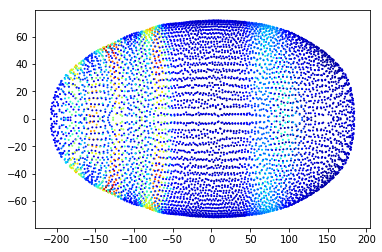

In [44]:
# plot input insute (in x and y only)

g = 'gt'

plt.scatter(gdf.x,gdf.y,s=1,c=insitu_raw[g],cmap='jet')
plt.scatter(gdf.x,-gdf.y,s=1,c=insitu_raw[g],cmap='jet')


In [45]:
# now get single cell data for these 84 genes

dg_insitu = dg.loc[insitu.columns]

In [110]:
# lets create some matrixes to work with

sc = dg.values.T # single cell 
sc84 = dg_insitu.values.T  # single cell for 84 genes
is84 = insitu_raw.values # insitu data
isb84 = insitu.values  # binarized insitu

(1297, 8924)

In [75]:
# cross correlation between
# single-cell and insitu data
# this is slow

sc_is = cdist(is84,sc84,cosine)

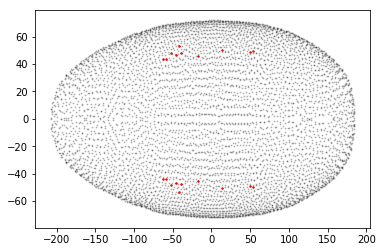

In [98]:
# this is the index of the cell
# play around with it to plot best 10 matches
# to that cell

cid = 13

n = 10

# best n cells

v = sc_is[:,cid]

bestn = sorted(range(len(v)), key=lambda i: v[i], reverse = True)[-n:]

plt.scatter(gdf.x,gdf.y,s=1,c='black',cmap='jet',alpha=.2)
plt.scatter(gdf.x,-gdf.y,s=1,c='black',cmap='jet',alpha=.2)

gdfp = gdf.loc[bestn]

plt.scatter(gdfp.x,gdfp.y,s=2,c='red',cmap='jet')
plt.scatter(gdfp.x,-gdfp.y,s=2,c='red',cmap='jet')


In [99]:
sc_is.shape

(3039, 1297)

In [100]:
# determine counts of how often a virtual cell is in the top 10 best matches to a sequenced cell
bestcounts = np.zeros(sc_is.shape[0])
n = 10

for cid in range(0,sc_is.shape[1]):
    v = sc_is[:,cid]
    bestn = sorted(range(len(v)), key=lambda i: v[i], reverse = True)[-n:]
    
    for b in bestn:
        bestcounts[b] += 1


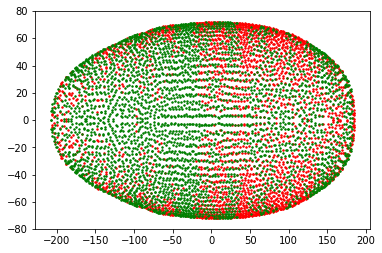

In [107]:
# plot virtual cells with no mapping in top10 of any cell red
# plot virtual cells with some mapping in top10 of some cell green

plt.scatter(gdf.x,gdf.y,s=1,c='black',cmap='jet',alpha=.2)
plt.scatter(gdf.x,-gdf.y,s=1,c='black',cmap='jet',alpha=.2)


none = [i for i in range(0,sc_is.shape[0]) if bestcounts[i] == 0]
gdfp = gdf.loc[none]
plt.scatter(gdfp.x,gdfp.y,s=2,c='red',cmap='jet')
plt.scatter(gdfp.x,-gdfp.y,s=2,c='red',cmap='jet')


some = [i for i in range(0,sc_is.shape[0]) if bestcounts[i] > 0]
gdfp = gdf.loc[some]
plt.scatter(gdfp.x,gdfp.y,s=2,c='green',cmap='jet')
plt.scatter(gdfp.x,-gdfp.y,s=2,c='green',cmap='jet')


In [112]:
sc.shape

(1297, 8924)

In [114]:
is84.shape

(3039, 84)

In [123]:
# for every virtual cell calculate an imputed expression pattern equal to top n matches to single cells

# determine counts of how often a virtual cell is in the top 10 best matches to a sequenced cell
vinsitu = np.zeros( (sc.shape[1],is84.shape[0]) )

n = 10

for vcid in range(0,is84.shape[0]):
    v = sc_is[vcid]
    bestn = sorted(range(len(v)), key=lambda i: v[i], reverse = True)[-n:]
    
    bestd = sc[bestn]
    vinsitu[:,vcid] = np.average(bestd,axis=0)

In [129]:
gindex = {}

for i,g in enumerate(genes):
    gindex[g] = i

5848

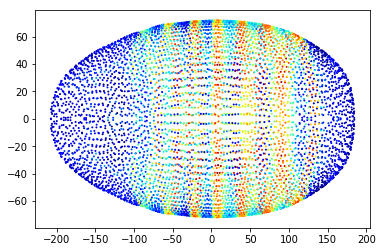

In [135]:
# plot virtual insitu for random gene

gid = gindex['eve']

plt.scatter(gdf.x, gdf.y,s=1,c=vinsitu[gid],cmap='jet')
plt.scatter(gdf.x,-gdf.y,s=1,c=vinsitu[gid],cmap='jet')


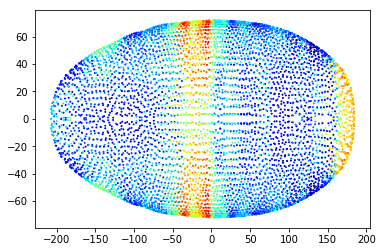

In [137]:
# plot virtual insitu for random gene

gid = gindex['Kr']

plt.scatter(gdf.x, gdf.y,s=1,c=vinsitu[gid],cmap='jet')
plt.scatter(gdf.x,-gdf.y,s=1,c=vinsitu[gid],cmap='jet')


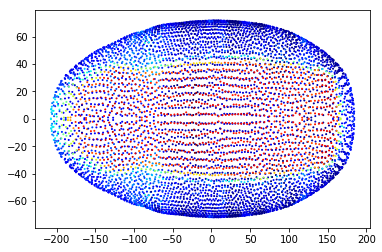

In [138]:
# plot virtual insitu for random gene

gid = gindex['sna']

plt.scatter(gdf.x, gdf.y,s=1,c=vinsitu[gid],cmap='jet')
plt.scatter(gdf.x,-gdf.y,s=1,c=vinsitu[gid],cmap='jet')


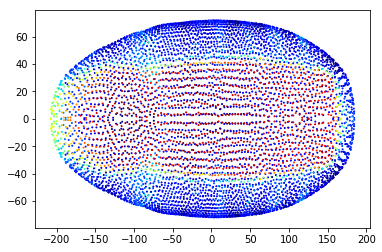

In [139]:
# plot virtual insitu for random gene

gid = gindex['twi']

plt.scatter(gdf.x, gdf.y,s=1,c=vinsitu[gid],cmap='jet')
plt.scatter(gdf.x,-gdf.y,s=1,c=vinsitu[gid],cmap='jet')


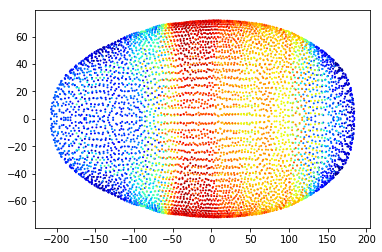

In [145]:
# plot virtual insitu for random gene

gid = gindex['tsh']

plt.scatter(gdf.x, gdf.y,s=1,c=vinsitu[gid],cmap='jet')
plt.scatter(gdf.x,-gdf.y,s=1,c=vinsitu[gid],cmap='jet')


In [142]:
insitu.columns

Index(['aay', 'Ama', 'Ance', 'Antp', 'apt', 'Blimp-1', 'bmm', 'bowl', 'brk',
       'Btk29A', 'bun', 'cad', 'CenG1A', 'CG10479', 'CG11208', 'CG14427',
       'CG17724', 'CG17786', 'CG43394', 'CG8147', 'cnc', 'croc', 'Cyp310a1',
       'D', 'dan', 'danr', 'Dfd', 'disco', 'Doc2', 'Doc3', 'dpn', 'edl', 'ems',
       'erm', 'Esp', 'E(spl)m5-HLH', 'eve', 'exex', 'fj', 'fkh', 'ftz', 'gk',
       'gt', 'h', 'hb', 'hkb', 'htl', 'Ilp4', 'ImpE2', 'ImpL2', 'ken', 'kni',
       'knrl', 'Kr', 'lok', 'Mdr49', 'Mes2', 'MESR3', 'mfas', 'Nek2', 'NetA',
       'noc', 'nub', 'numb', 'oc', 'odd', 'peb', 'prd', 'pxb', 'rau', 'rho',
       'run', 'sna', 'srp', 'tkv', 'tll', 'toc', 'Traf4', 'trn', 'tsh', 'twi',
       'zen', 'zen2', 'zfh1'],
      dtype='object')